PART 1:

task 1:

In [47]:
import pandas as pd

#import csv files
ADSK = pd.read_csv("ADSK.csv")
CAH = pd.read_csv("CAH.csv")
LRCX = pd.read_csv("LRCX.csv")
TMO = pd.read_csv("TMO.csv")

companies = [ADSK, CAH, LRCX, TMO]
companies_names = ["ADSK", "CAH", "LRCX", "TMO"]

for company in companies:
    company["Date"] = pd.to_datetime(company["Date"])

count = 0
for company, company_name in zip(companies, companies_names):
    diff = company["Open"] - company["Close"]
    if (diff == 0).all():
        print(f"Yes, for {company_name}")
    else:
        count += 1
if count == 4:
    print("No")

# bonus: it would have meant that the stock price didn"t change at all during the day and as we analyze all lines(days) it would have meant the price hasn"t changed at all during the whole period.
# actually it could change during the day (different highs and lows) but the opening and closing prices would be the same (9:30 and 15:30 USA time)




No


task 2:

In [46]:
for company, company_name in zip(companies, companies_names):
    print(f"{company_name}: highest: {company["Close"].max()}, lowest: {company["Close"].min()}")

ADSK: highest: 342.27, lowest: 76.18
CAH: highest: 77.544, lowest: 35.371
LRCX: highest: 60.855, lowest: 5.943
TMO: highest: 662.682, lowest: 138.154


task 3:

In [45]:
import math

for company, company_name in zip(companies, companies_names):
    min = company["Close"].min()
    max = company["Close"].max()
    mean = company["Close"].mean()
    median = company["Close"].median()
    print(f"{company_name}: min: {math.log(min):.2f}, max: {math.log(max):.2f}, mean: {math.log(mean):.2f}, median: {math.log(median):.2f}")

ADSK: min: 4.33, max: 5.84, mean: 5.22, median: 5.16
CAH: min: 3.57, max: 4.35, mean: 3.90, median: 3.87
LRCX: min: 1.78, max: 4.11, mean: 3.20, median: 2.94
TMO: min: 4.93, max: 6.50, mean: 5.87, median: 5.72


task 4:

In [44]:
import math
import numpy as np

for company, company_name in zip(companies, companies_names):
    gain = company["Close"] - company["Open"]
    loss = company["Open"] - company["Close"]

    log_gain = gain[gain > 0].pipe(np.log)
    log_loss = loss[loss > 0].pipe(np.log)

    print(f"{company_name}: highest gain: {company["Date"][log_gain.idxmax()].strftime("%Y-%m-%d")}, highestloss: {company["Date"][log_loss.idxmin()].strftime("%Y-%m-%d")}")



ADSK: highest gain: 2021-02-24, highestloss: 2018-12-03
CAH: highest gain: 2022-08-11, highestloss: 2017-02-16
LRCX: highest gain: 2022-01-14, highestloss: 2020-10-01
TMO: highest gain: 2022-04-07, highestloss: 2018-02-13


task 5:

In [ ]:
for company, company_name in zip(companies, companies_names):
    week_vol = company.resample("W", on="Date")["Volume"].mean()
    print(f"{company_name} average weekly volume: {week_vol.mean():.2f}")

ADSK average weekly volume: 1801696.15
CAH average weekly volume: 2775551.93
LRCX average weekly volume: 20517676.36
TMO average weekly volume: 1529213.19


task 6:

In [ ]:
totals = []
max_index = 0
for company, company_name in zip(companies, companies_names):
    n = company.shape[0]
    total = company["Close"][n-1] - company["Close"][0]
    totals.append(total)
    if total > totals[max_index]:
        max_index = totals.index(total)

print(f"It is {companies_names[max_index]}: {totals[max_index]}")




It is TMO: 407.347


task 7:


In [77]:
for company in companies:
    quartile = (company["Volume"].max() - company["Volume"].min())/4

    kam = [
        company["Volume"] < company["Volume"].min() + quartile,
        company["Volume"] < company["Volume"].min() + quartile*2,
        company["Volume"] < company["Volume"].min() + quartile*3,
        company["Volume"] >= company["Volume"].min() + quartile*3]
    
    co = ['Low', 'Medium', 'High', 'Very High']
    company['volume_class'] = np.select(kam, co)




8:

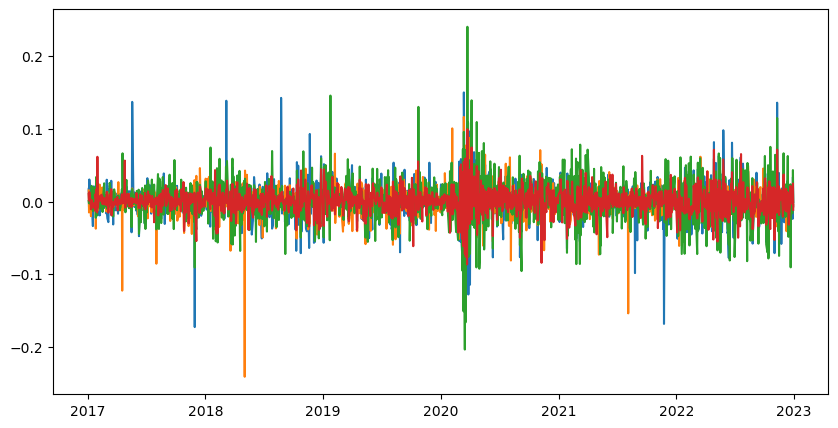

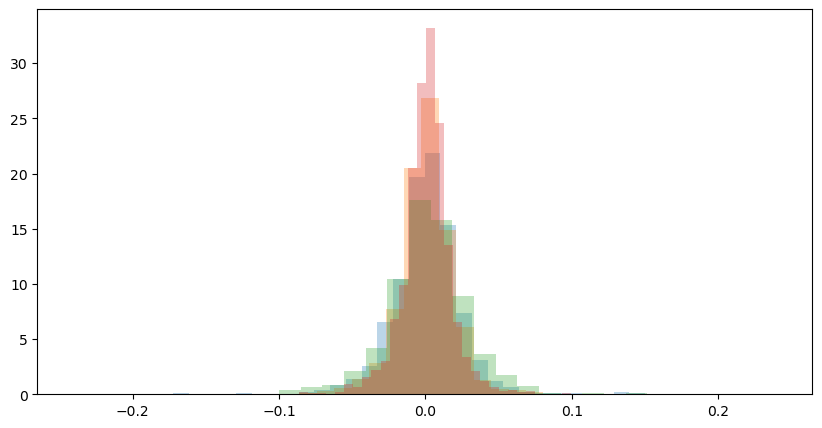

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for company, company_name in zip(companies, companies_names):
   returns = np.log(company['Close'] / company['Close'].shift(1))
   plt.plot(company['Date'], returns, label=company_name)

plt.figure(figsize=(10, 5))
for company, company_name in zip(companies, companies_names):
   returns = np.log(company['Close'] / company['Close'].shift(1))
   plt.hist(returns.dropna(), bins=30, alpha=0.3, label=company_name, density=True)



In [87]:
print(ADSK.head())




        Date   Open   High    Low  Close   Volume  Dividends  Stock Splits  \
0 2017-01-03  74.61  77.10  74.50  76.18  1896300        0.0           0.0   
1 2017-01-04  76.19  77.96  76.09  77.52  1889500        0.0           0.0   
2 2017-01-05  77.08  77.63  76.33  76.93  1368200        0.0           0.0   
3 2017-01-06  77.28  79.81  76.89  79.30  1587700        0.0           0.0   
4 2017-01-09  78.95  79.74  78.26  79.59  1489000        0.0           0.0   

  volume_class  
0          Low  
1          Low  
2          Low  
3          Low  
4          Low  
